<a href="https://colab.research.google.com/github/heethsakariya/ImageProccessingDA1/blob/main/ImageProcessingDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Heeth Sakariya

RegNo: 19BCE1568

Digital Assignment 1

CSE-4019 Image Proccessing

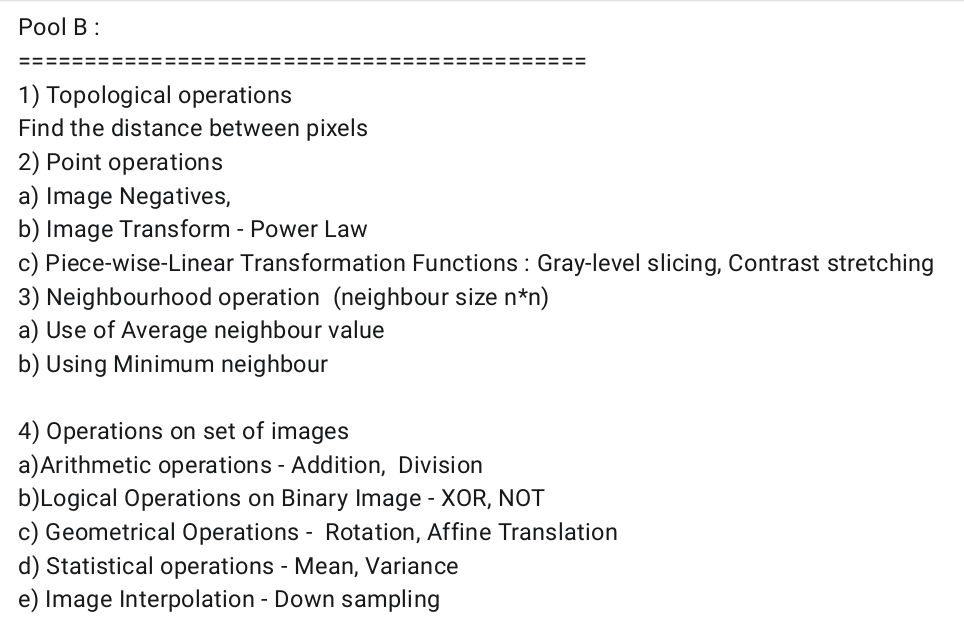

In [9]:
import cv2
import numpy as np
import pandas as pd
import math
import scipy.ndimage as scnd
from google.colab.patches import cv2_imshow
from statistics import mean, variance

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Background.jpg to Background.jpg
Saving BackgroundR.jpg to BackgroundR.jpg
Saving Sample.jpg to Sample.jpg
Saving SampleR.jpg to SampleR.jpg


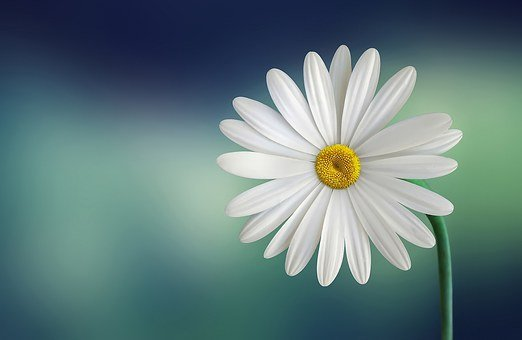

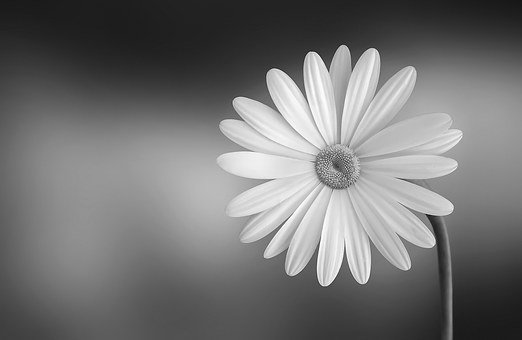

In [11]:
img = cv2.imread('/content/Sample.jpg')
imgGray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(imgGray)

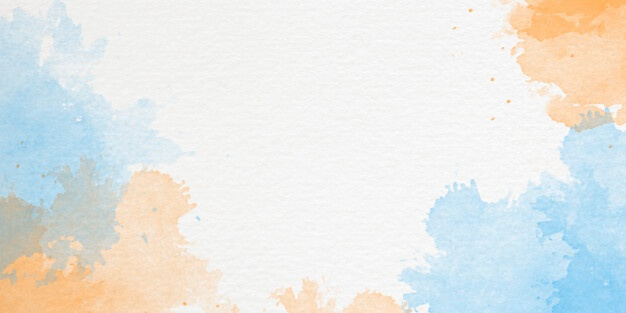

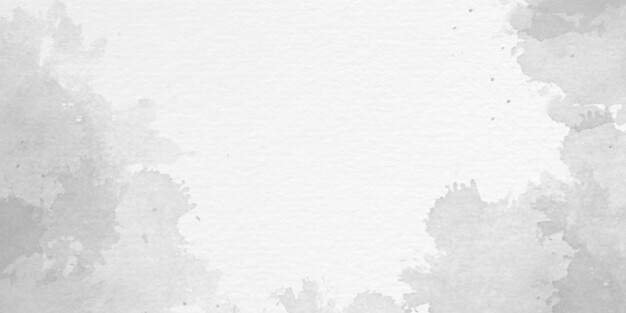

In [12]:
bg = cv2.imread('/content/Background.jpg')
bgGray = cv2.cvtColor(bg , cv2.COLOR_BGR2GRAY)
cv2_imshow(bg)
cv2_imshow(bgGray)

1)Distance Between pixels say P(x,y) and Q(s,t)

(340, 522, 3)


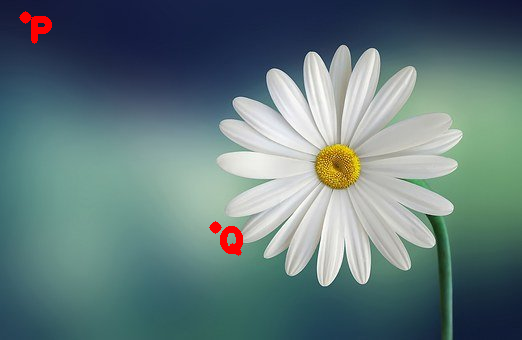

Euclidean Distance : 10.583005244258363
City Block Distance : 400
Chess Board Distance : 210


In [ ]:
P = (10,20)
Q = (200,230)

cv2.putText(img, ".", P, cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255), 5)
cv2.putText(img, "P", (P[0]+20,P[1]+20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 5)
cv2.putText(img, ".", Q, cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255), 5)
cv2.putText(img, "Q", (Q[0]+20,Q[1]+20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 5)

print(img.shape)

cv2_imshow(img)

euclideanDistance = math.sqrt( ( P[0]-Q[0] )^2 + ( P[1]-Q[1] )^2 )
cityBlockDistance = abs( P[0] - Q[0] ) + abs( P[1] - Q[1] )
chessBoardDistance = max( abs( P[0] - Q[0] ) , abs( P[1] - Q[1] ))

print("Euclidean Distance :" , euclideanDistance)
print("City Block Distance :" , cityBlockDistance)
print("Chess Board Distance :" , chessBoardDistance)

2)Point Operations

    a)Image Negatives(Gray Image Negative)

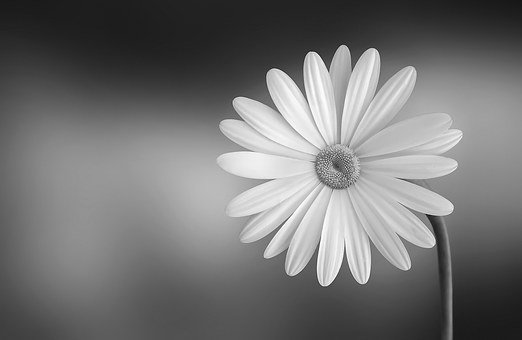

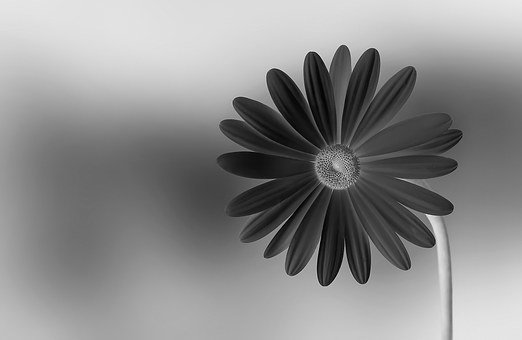

In [13]:
L = imgGray.max()
imgNegative = L - imgGray
cv2.imwrite( "/content/SampleNegative.jpg", imgNegative)
cv2_imshow(imgGray)
cv2_imshow(imgNegative)

    a)Image Negative( Color Image Negative)

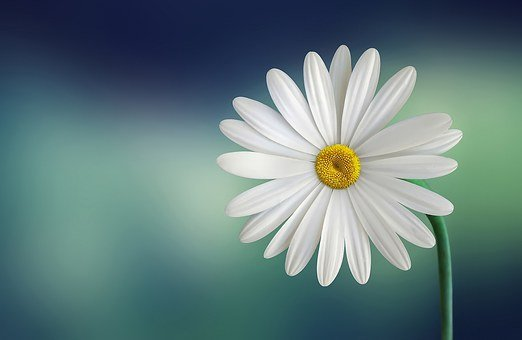

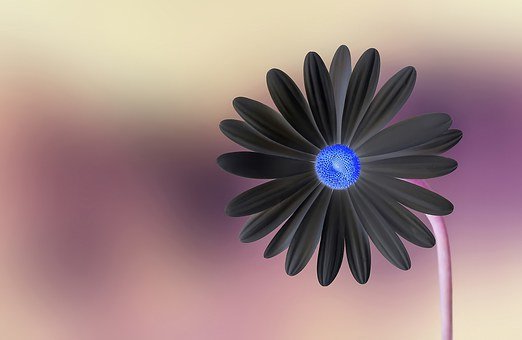

In [14]:
cv2_imshow(img)
M = img.max()
imgN = M - img
cv2_imshow(imgN) 

2)Point Operations

    b)Power Law Transform ( s = cr^gamma )

(340, 522, 3)


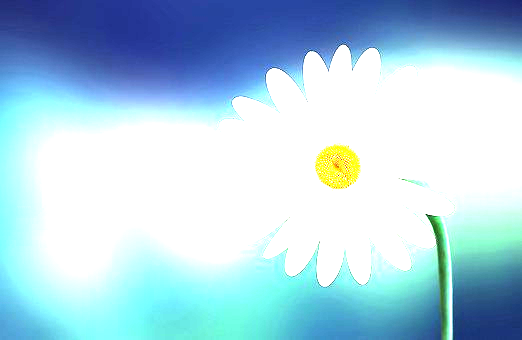

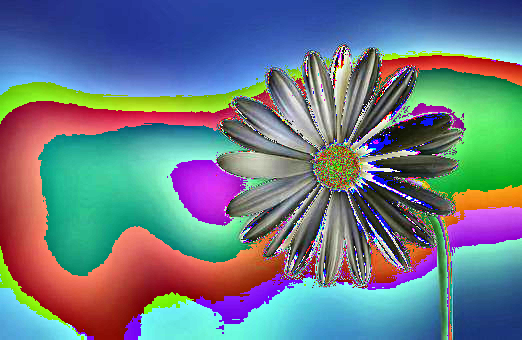

In [16]:
imgShape = img.shape
print(imgShape)

c = 1
gamma = 1.2
imgPower = c*(img**gamma)
cv2_imshow(imgPower)


b, g, r = cv2.split(img)
c = 1
gamma = 1.2
imgNew = np.zeros_like(img)
for i in range (imgShape[0]):
  for j in range (imgShape[1]):
    b[i][j] = float(c*((b[i][j])**gamma))
    g[i][j] = float(c*((g[i][j])**gamma))
    r[i][j] = float(c*((r[i][j])**gamma))
    imgNew[i][j] = [b[i][j], g[i][j], r[i][j]]
cv2_imshow(imgNew)


    b)Power Law Transform (Grey Image)

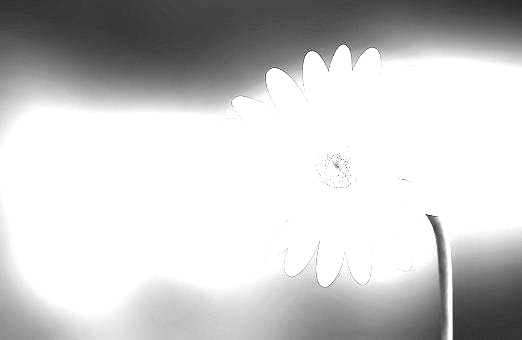

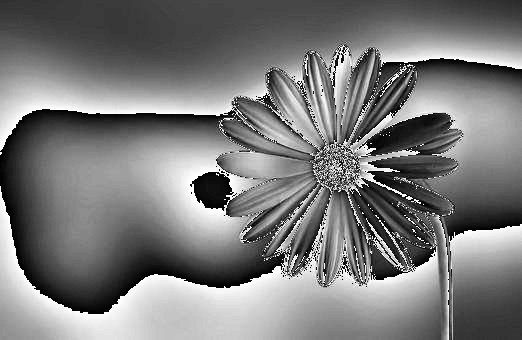

In [17]:
c = 1
gamma = 1.2

imgPower = c*((imgGray**gamma))
cv2_imshow(imgPower)

imgNew = np.zeros_like(img)
for i in range (imgShape[0]):
  for j in range (imgShape[1]):
    imgNew[i][j] = c*(imgGray[i][j]**gamma)
cv2_imshow(imgNew)

    c)Grey Level Slicing

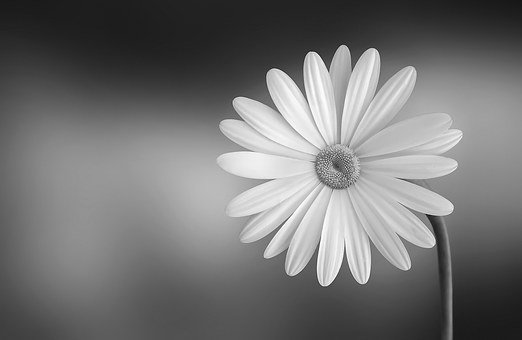

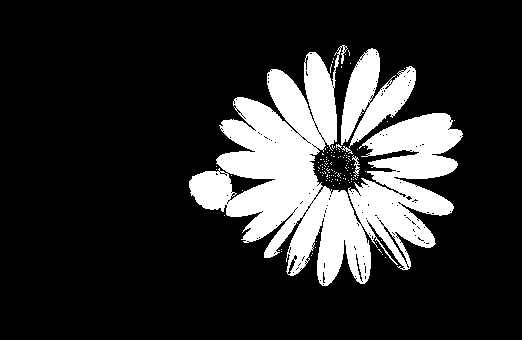

In [18]:
cv2_imshow(imgGray)

t = 180
t, imgGrayLevelSlicing = cv2.threshold(imgGray, t, 255, cv2.THRESH_BINARY)
cv2_imshow(imgGrayLevelSlicing)

    c)Gray Level Slicing(Color Image)

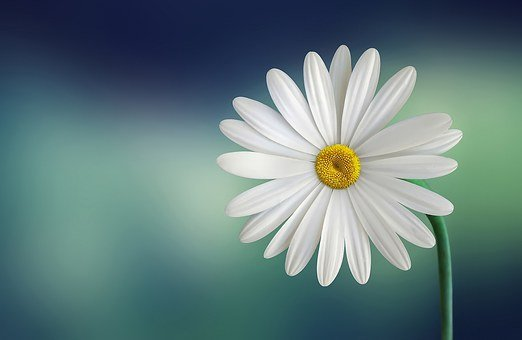

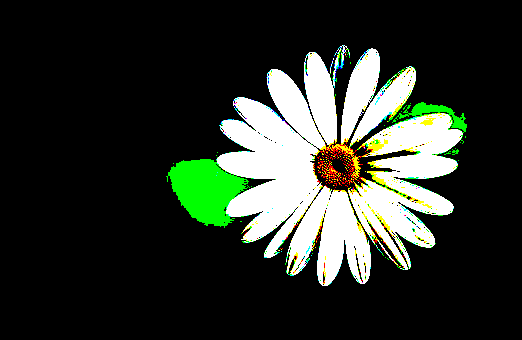

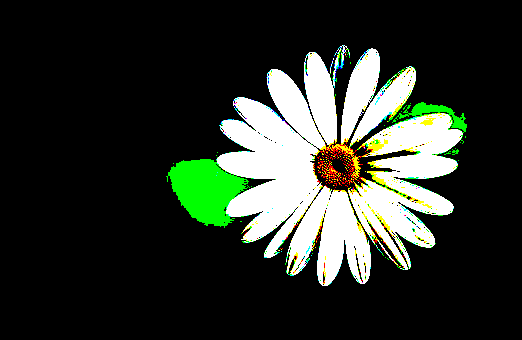

In [19]:
cv2_imshow(img)

#METHORD 1
t = 180
t, imgSlicing = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
cv2_imshow(imgSlicing)

#METHORD 2
bt = rt = gt = 180
b, g, r = cv2.split(img)
bt, bSlicing = cv2.threshold(b, bt, 255, cv2.THRESH_BINARY)
gt, gSlicing = cv2.threshold(g, gt, 255, cv2.THRESH_BINARY)
rt, rSlicing = cv2.threshold(r, rt, 255, cv2.THRESH_BINARY)

imgSlicingNew = cv2.merge((bSlicing, gSlicing, rSlicing) )
cv2_imshow(imgSlicingNew)

    c)Grey Level Slicing in range (a,b) i.e intensities in this range unchanged rest all turned to 0

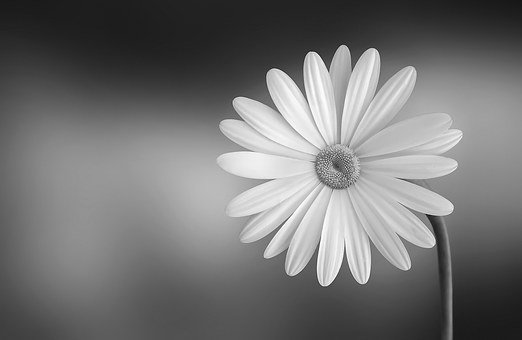

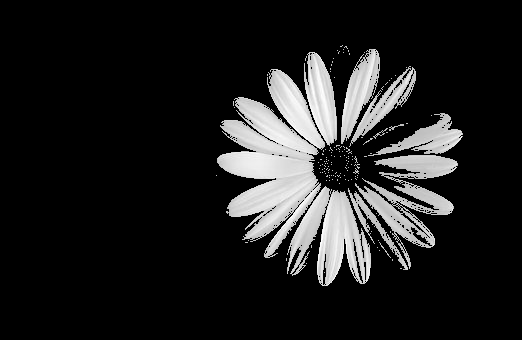

In [20]:
cv2_imshow(imgGray)
a = 190
b = 255

imgGS = np.zeros_like(imgGray)

for i in range(imgGray.shape[0]):
  for j in range(imgGray.shape[1]):
    if (imgGray[i][j] < a): 
      imgGS[i][j] = 0
    elif (imgGray[i][j] > b):
      imgGS[i][j] = 0
    else:
      imgGS[i][j] = imgGray[i][j]

cv2_imshow(imgGS)


    c)Contrast Streching
    (intensity values between (a,b) are applied linear function 2*x + 5)

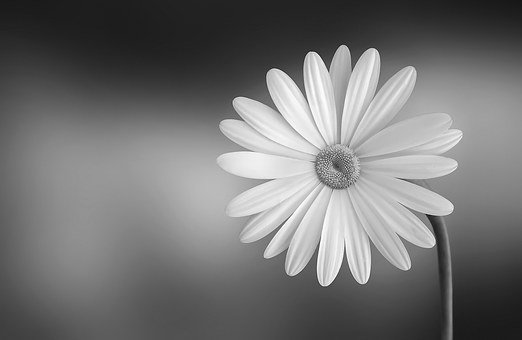

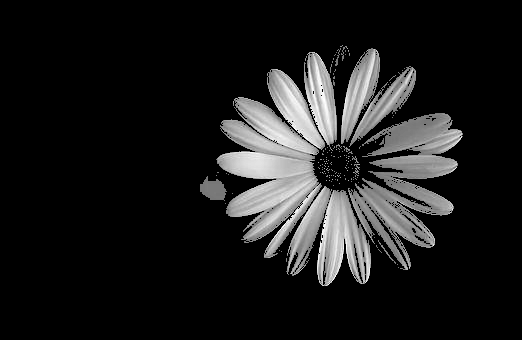

In [21]:
cv2_imshow(imgGray)

imgContrast = np.zeros_like(imgGray)
a = 185
b = 255

for i in range(imgGray.shape[0]):
  for j in range(imgGray.shape[1]):
    if (imgGray[i][j] < a): 
      imgContrast[i][j] = 0
    elif (imgGray[i][j] > b):
      imgContrast[i][j] = 0
    else:
      imgContrast[i][j] = 2*(imgGray[i][j]) + 5 # linear function y = 2*x + c ;x = old intensity value y = new intensity value

cv2_imshow(imgContrast)


Q3)Neighbourhood operation  (neighbour size n*n) 

    a) Use of Average neighbour value

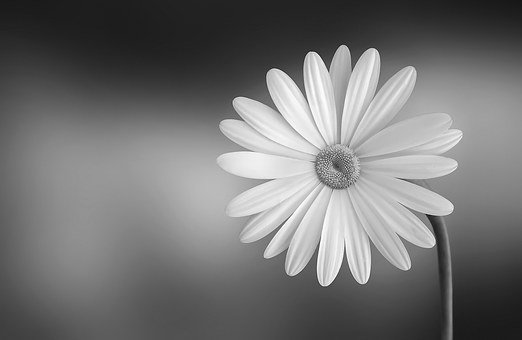

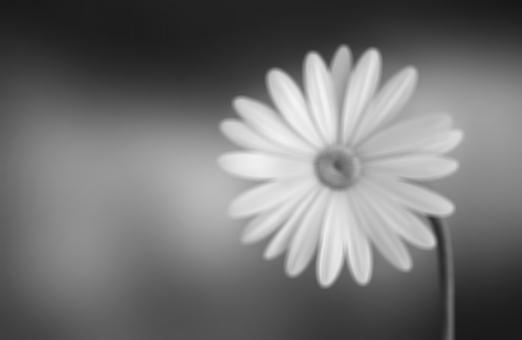

In [22]:
cv2_imshow(imgGray)
nx = 3
ny = 3
imgNeighb = np.zeros_like(imgGray)
for i in range(imgGray.shape[0]):
  for j in range(imgGray.shape[1]):
    imgNeighboor = imgGray[ max(0, i - nx) : min(imgGray.shape[0], nx + i) , max(0, j - ny) : min(imgGray.shape[1], ny + j)]
    imgNeighb[i][j] = np.mean(imgNeighboor)

cv2_imshow(imgNeighb)

    b) Using Minimum neighbour

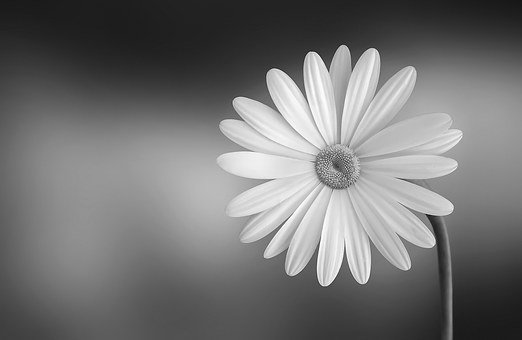

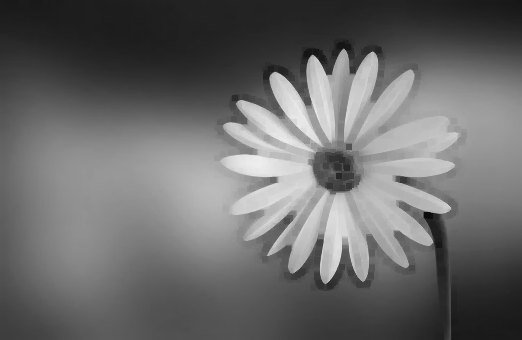

In [23]:
cv2_imshow(imgGray)
nx = 3
ny = 3
imgNeighb = np.zeros_like(imgGray)
for i in range(imgGray.shape[0]):
  for j in range(imgGray.shape[1]):
    imgNeighboor = imgGray[ max(0, i - nx) : min(imgGray.shape[0], nx + i) , max(0, j - ny) : min(imgGray.shape[1], ny + j)]
    imgNeighb[i][j] = np.min(imgNeighboor)

cv2_imshow(imgNeighb)

Q4) Operations on set of images

    a)  Arithmetic operations - Addition,  Division

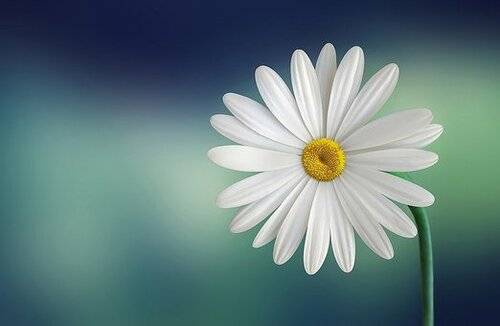

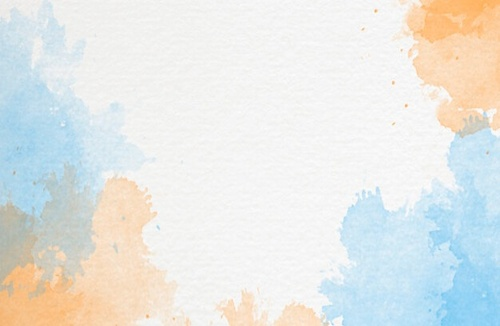

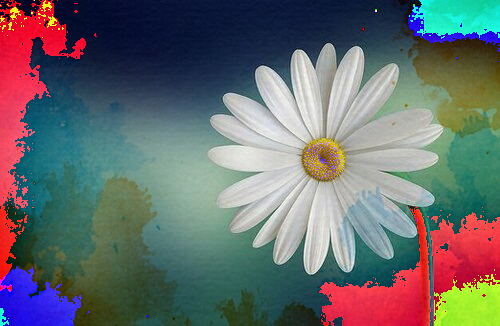

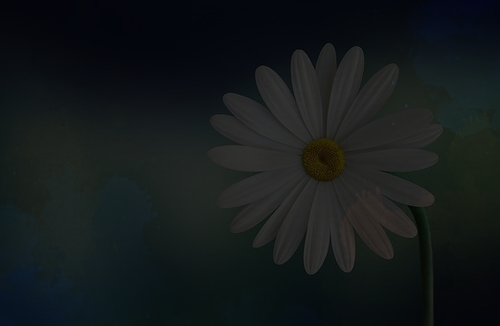

In [24]:
imgR = cv2.imread('/content/SampleR.jpg')
bgR = cv2.imread('/content/BackgroundR.jpg')

cv2_imshow(imgR)
cv2_imshow(bgR)

add = imgR+bgR
div = imgR/bgR
cv2_imshow(add)
cv2_imshow(50*div)

    b)  Logical Operations on Binary Image - XOR, NOT 


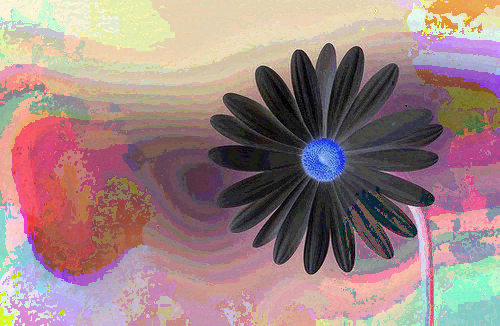

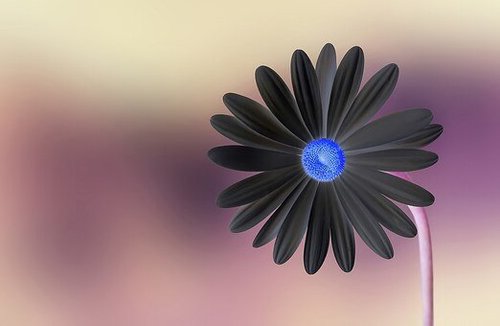

In [25]:
imgXOR = cv2.bitwise_xor(imgR, bgR)
cv2_imshow(imgXOR)

imgNOT = cv2.bitwise_not(imgR)
cv2_imshow(imgNOT)

    c)  Geometrical Operations -  Rotation, Affine Translation  

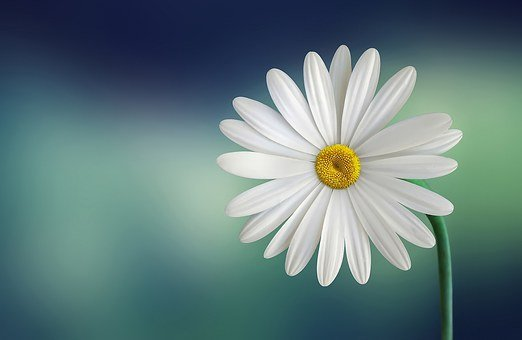

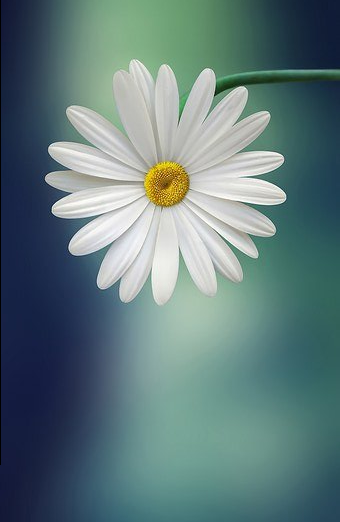

In [26]:
rotatedimg = scnd.rotate(img, 90, reshape=True)
cv2_imshow(img)
cv2_imshow(rotatedimg)


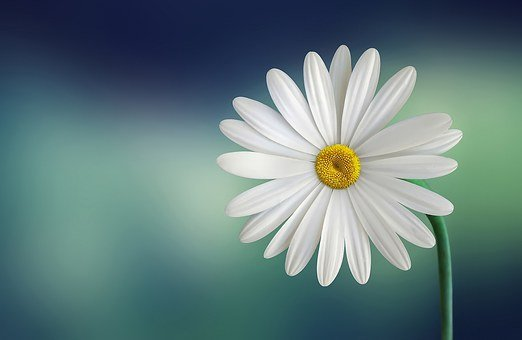

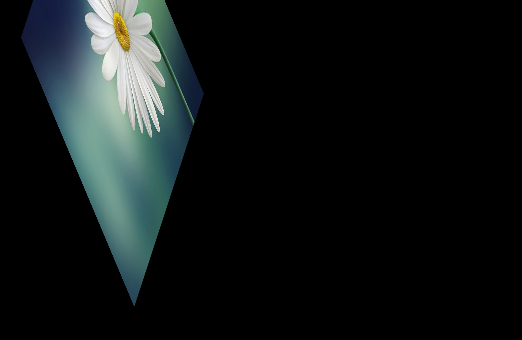

In [27]:
pts1 = np.float32([[20, 20], [120, 40], [70, 90]])
pts2 = np.float32([[30, 45], [50, 20], [60, 80]])
  
affline = cv2.getAffineTransform(pts1, pts2)
afflineTransformimg = cv2.warpAffine(img, affline, (img.shape[1],img.shape[0]))
cv2_imshow(img)
cv2_imshow(afflineTransformimg)


    d)  Statistical operations - Mean, Variance  


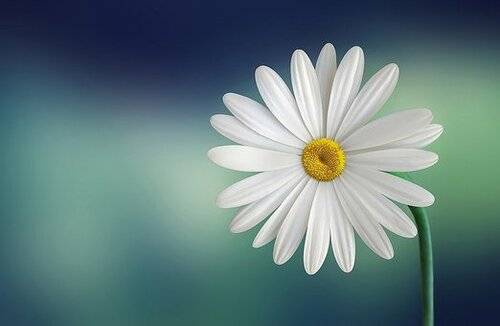

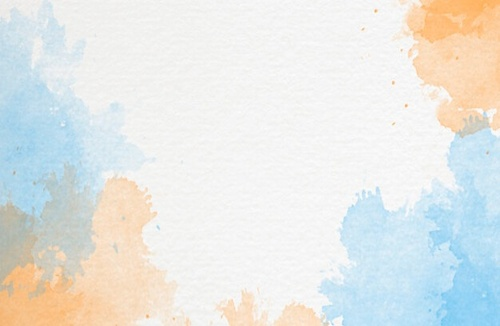

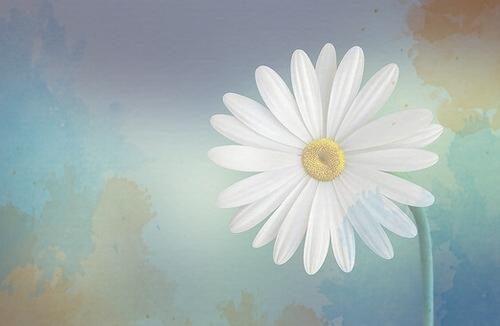

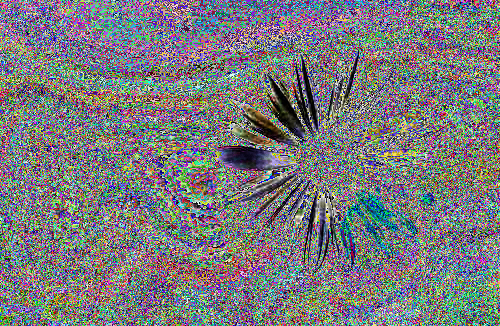

In [28]:
imgMean = np.zeros_like(imgR)
imgVar = np.zeros_like(imgR)

for i in range(imgR.shape[0]):
  for j in range(imgR.shape[1]):
    for k in range(imgR.shape[2]):
      l = []
      l.append(imgR[i][j][k])
      l.append(bgR[i][j][k])
      imgMean[i][j][k] = np.mean(l)
      imgVar[i][j][k] = np.var(l)

cv2_imshow(imgR)
cv2_imshow(bgR)
cv2_imshow(imgMean)
cv2_imshow(imgVar)


    e)  Image Interpolation - Down sampling

Size Before down Sampling  (340, 522, 3)


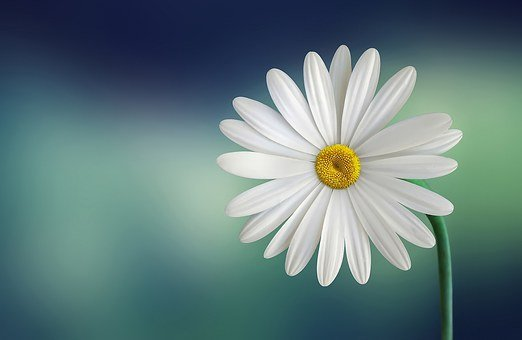

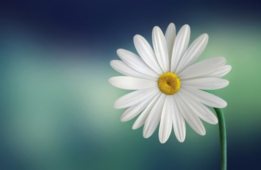

Size After down Sampling  (170, 261, 3)


In [29]:
print("Size Before down Sampling ", img.shape)
cv2_imshow(img)
imgDownSampling = cv2.pyrDown(img)
cv2_imshow(imgDownSampling)
print("Size After down Sampling ", imgDownSampling.shape)
